In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pickle

In [3]:
# Load the data
file_path = 'C:\\Users\\herat\\Desktop\\Subjects\\Spring Semester\\BSAN 6198-1\\Project 2\\CHLA_clean_data_until_2023.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21060 entries, 0 to 21059
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   MRN                                       21060 non-null  int64 
 1   APPT_STATUS                               21060 non-null  object
 2   APPT_DATE                                 21060 non-null  object
 3   BOOK_DATE                                 21060 non-null  object
 4   ZIPCODE                                   21060 non-null  object
 5   CLINIC                                    21060 non-null  object
 6   SCHEDULE_ID                               21060 non-null  int64 
 7   APPT_ID                                   21060 non-null  int64 
 8   LEAD_TIME                                 21060 non-null  int64 
 9   IS_REPEAT                                 21060 non-null  object
 10  APPT_TYPE_STANDARDIZE                     2106

(       MRN  APPT_STATUS         APPT_DATE         BOOK_DATE ZIPCODE  \
 0  1946298    CONFIRMED  12/26/2023 10:30    6/6/2023 10:32   91387   
 1  4464320  RESCHEDULED  12/26/2023 10:00  12/27/2022 10:19   91354   
 2  4464320    CONFIRMED  12/26/2023 10:00  12/27/2022 10:19   91354   
 3  4146637    CONFIRMED  12/21/2023 10:30   1/23/2023 10:59   91350   
 4  4460795    CONFIRMED  12/18/2023 09:00    1/9/2023 10:59   91402   
 
                  CLINIC  SCHEDULE_ID   APPT_ID  LEAD_TIME IS_REPEAT  ...  \
 0  VALENCIA CARE CENTER     22576917  77137126        202         Y  ...   
 1  VALENCIA CARE CENTER     21812159  74489619        363         Y  ...   
 2  VALENCIA CARE CENTER     22496669  76863542        363         Y  ...   
 3  VALENCIA CARE CENTER     22466003  76767204        331         Y  ...   
 4  VALENCIA CARE CENTER     21862889  74656637        342         Y  ...   
 
   TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT  TOTAL_NUMBER_OF_NOSHOW  DAY_OF_WEEK  \
 0                     

In [4]:
# Calculate the correlation matrix for the numerical variables
correlation_matrix = data.select_dtypes(include=['int64', 'float64']).corr()

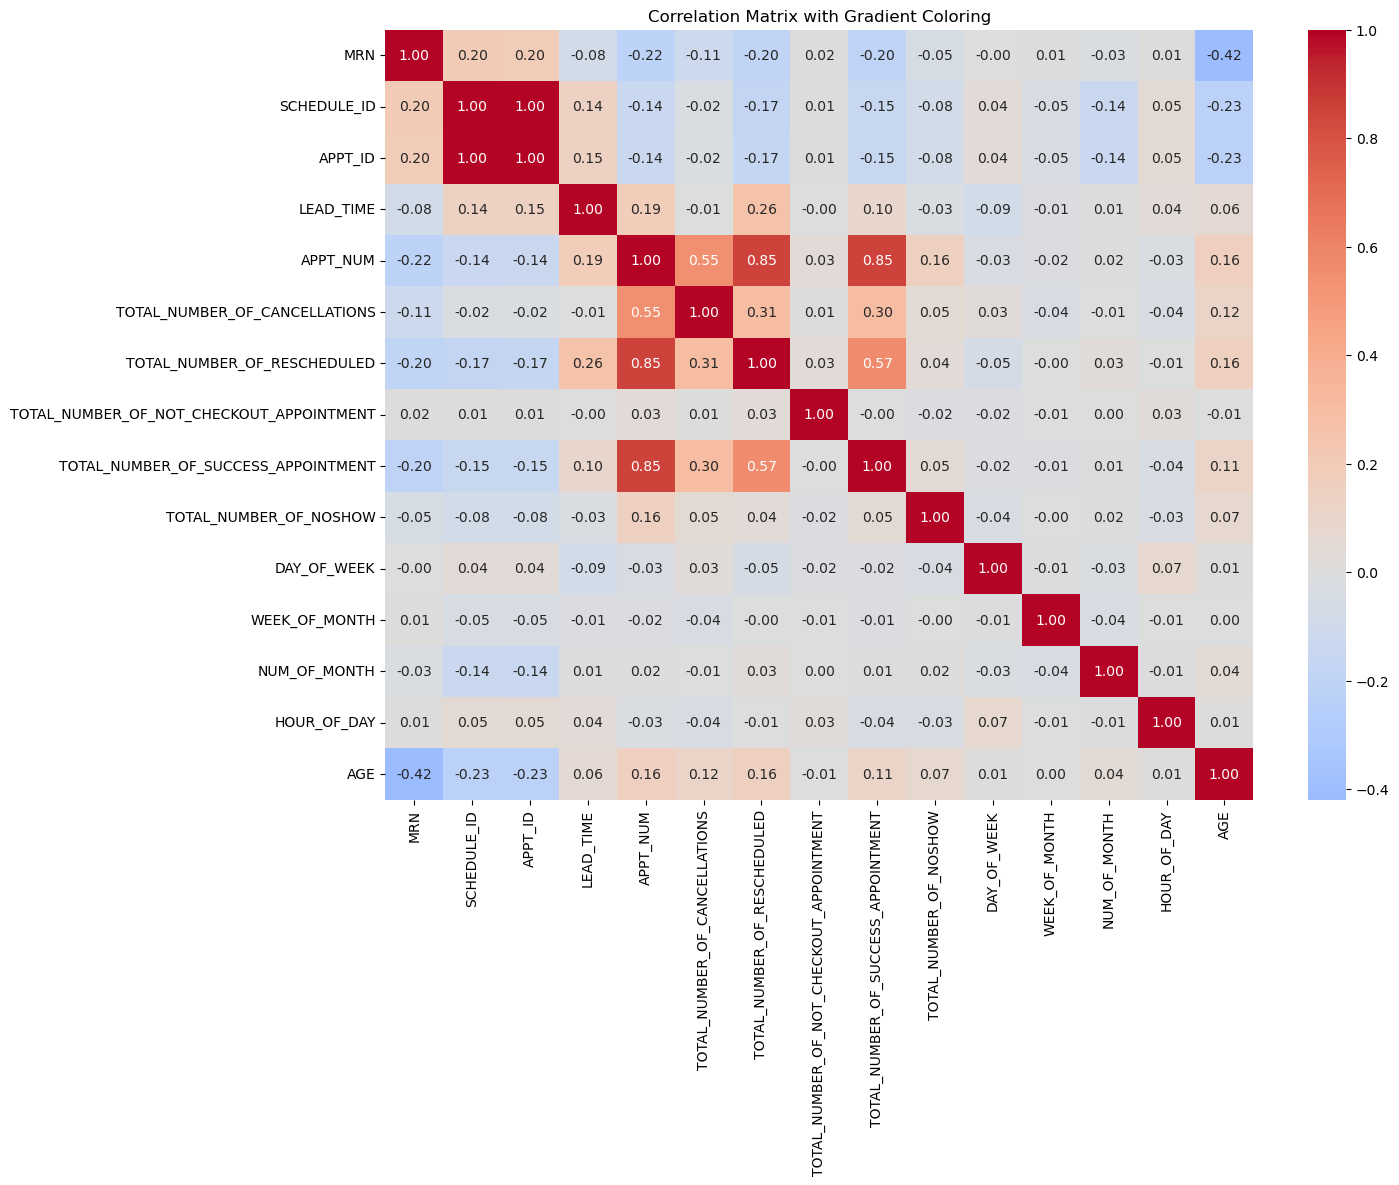

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the matplotlib figure
plt.figure(figsize=(14, 10))

# Generate a heatmap with gradient coloring
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

# Display the heatmap
plt.title('Correlation Matrix with Gradient Coloring')
plt.show()

In [6]:
# Selecting relevant features and the target variable
X = data[['TOTAL_NUMBER_OF_CANCELLATIONS', 'TOTAL_NUMBER_OF_RESCHEDULED', 
          'TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT', 
          'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT', 'TOTAL_NUMBER_OF_NOSHOW']]
y = data['IS_NOSHOW']

# Convert the target variable to numerical format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# We'll use the training and test sets to train and evaluate the models
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((16848, 5), (4212, 5)), ((16848,), (4212,)))

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Train the Logistic Regression model
log_reg.fit(X_train, y_train)

# Predict on the test set
log_reg_predictions = log_reg.predict(X_test)

# Calculate accuracy and ROC-AUC
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
log_reg_roc_auc = roc_auc_score(y_test, log_reg.bpredict_proba(X_test)[:, 1])

(log_reg_accuracy, log_reg_roc_auc)

AttributeError: 'LogisticRegression' object has no attribute 'bpredict_proba'

In [8]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import roc_auc_score
import numpy as np

# Define the k-fold cross-validator (e.g., k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation for accuracy
accuracy_scores = cross_val_score(log_reg, X, y_encoded, cv=kf, scoring='accuracy')

# Predict probabilities for calculating ROC-AUC
y_prob = cross_val_predict(log_reg, X, y_encoded, cv=kf, method='predict_proba')

# Calculate ROC-AUC from the probabilities
roc_auc = roc_auc_score(y_encoded, y_prob[:, 1])  # Consider the probability of the positive class

# Print the results
print(f'Accuracy scores for each fold: {accuracy_scores}')
print(f'Mean Accuracy: {np.mean(accuracy_scores)}')
print(f'ROC-AUC Score: {roc_auc}')

Accuracy scores for each fold: [0.94705603 0.95061728 0.9480057  0.94586895 0.94919278]
Mean Accuracy: 0.9481481481481481
ROC-AUC Score: 0.9453697092661597


In [9]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
dt_predictions = decision_tree.predict(X_test)

# Calculate accuracy and ROC-AUC
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])

print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'Decision Tree ROC-AUC: {dt_roc_auc}')

Decision Tree Accuracy: 0.9622507122507122
Decision Tree ROC-AUC: 0.9320061389364676


In [10]:
# Cross-validation for accuracy
dt_accuracy_scores = cross_val_score(decision_tree, X, y_encoded, cv=kf, scoring='accuracy')

# Predict probabilities for calculating ROC-AUC
dt_y_prob = cross_val_predict(decision_tree, X, y_encoded, cv=kf, method='predict_proba')

# Calculate ROC-AUC from the probabilities
dt_roc_auc_score = roc_auc_score(y_encoded, dt_y_prob[:, 1])  # Consider the probability of the positive class

# Print the results
print(f'Decision Tree Accuracy scores for each fold: {dt_accuracy_scores}')
print(f'Decision Tree Mean Accuracy: {np.mean(dt_accuracy_scores)}')
print(f'Decision Tree ROC-AUC Score: {dt_roc_auc_score}')

Decision Tree Accuracy scores for each fold: [0.96225071 0.96296296 0.95987654 0.95750237 0.96011396]
Decision Tree Mean Accuracy: 0.9605413105413106
Decision Tree ROC-AUC Score: 0.9272154421153901


In [11]:
# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test set
rf_predictions = random_forest.predict(X_test)

# Calculate accuracy and ROC-AUC
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])

print(f'Random Forest Accuracy: {rf_accuracy}')
print(f'Random Forest ROC-AUC: {rf_roc_auc}')


Random Forest Accuracy: 0.9615384615384616
Random Forest ROC-AUC: 0.9403467734127634


In [12]:
# Cross-validation for accuracy
rf_accuracy_scores = cross_val_score(random_forest, X, y_encoded, cv=kf, scoring='accuracy')

# Predict probabilities for calculating ROC-AUC
rf_y_prob = cross_val_predict(random_forest, X, y_encoded, cv=kf, method='predict_proba')

# Calculate ROC-AUC
rf_roc_auc_score = roc_auc_score(y_encoded, rf_y_prob[:, 1])

# Print the results
print(f'Random Forest Accuracy scores for each fold: {rf_accuracy_scores}')
print(f'Random Forest Mean Accuracy: {np.mean(rf_accuracy_scores)}')
print(f'Random Forest ROC-AUC Score: {rf_roc_auc_score}')

Random Forest Accuracy scores for each fold: [0.96153846 0.9634378  0.95892688 0.95750237 0.96035138]
Random Forest Mean Accuracy: 0.9603513770180439
Random Forest ROC-AUC Score: 0.9319970315002145


In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=42)

# Train the model
gbm.fit(X_train, y_train)

# Predict on the test set
gbm_predictions = gbm.predict(X_test)

# Calculate accuracy and ROC-AUC
gbm_accuracy = accuracy_score(y_test, gbm_predictions)
gbm_roc_auc = roc_auc_score(y_test, gbm.predict_proba(X_test)[:, 1])

print(f'GBM Accuracy: {gbm_accuracy}')
print(f'GBM ROC-AUC: {gbm_roc_auc}')

GBM Accuracy: 0.9615384615384616
GBM ROC-AUC: 0.9659854391503024


In [14]:
# Cross-validation for accuracy
gbm_accuracy_scores = cross_val_score(gbm, X, y_encoded, cv=kf, scoring='accuracy')

# Predict probabilities for calculating ROC-AUC
gbm_y_prob = cross_val_predict(gbm, X, y_encoded, cv=kf, method='predict_proba')

# Calculate ROC-AUC
gbm_roc_auc_score = roc_auc_score(y_encoded, gbm_y_prob[:, 1])

# Print the rbesults
print(f'GBM Accuracy scores for each fold: {gbm_accuracy_scores}')
print(f'GBM Mean Accuracy: {np.mean(gbm_accuracy_scores)}')
print(f'GBM ROC-AUC Score: {gbm_roc_auc_score}')

GBM Accuracy scores for each fold: [0.96153846 0.96391263 0.95940171 0.96011396 0.95963913]
GBM Mean Accuracy: 0.9609211775878442
GBM ROC-AUC Score: 0.9673982717716368


In [16]:
pickle_out = open("model_V2.pkl", "wb")
pickle.dump(gbm, pickle_out)
pickle_out.close()

In [17]:
from sklearn.svm import SVC

# Initialize Support Vector Classifier with probability=True
svm = SVC(probability=True, random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Predict on the test set
svm_predictions = svm.predict(X_test)

# Calculate accuracy. For ROC-AUC, SVM requires probability estimates which are computationally expensive
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_roc_auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])

print(f'SVM Accuracy: {svm_accuracy}')
print(f'SVM ROC-AUC: {svm_roc_auc}')

SVM Accuracy: 0.9627255460588794
SVM ROC-AUC: 0.9230720500294636


In [18]:
from sklearn.svm import SVC

# Initialize Support Vector Classifier with probability=True
svm = SVC(probability=True, random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Predict on the test set
svm_predictions = svm.predict(X_test)

# Calculate accuracy. For ROC-AUC, SVM requires probability estimates which are computationally expensive
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_roc_auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])

print(f'SVM Accuracy: {svm_accuracy}')
print(f'SVM ROC-AUC: {svm_roc_auc}')

SVM Accuracy: 0.9627255460588794
SVM ROC-AUC: 0.9230720500294636


In [19]:
# Note: Calculating cross-validated ROC-AUC for SVM may be very time-consuming due to the need for probability estimation

# Cross-validation for accuracy
svm_accuracy_scores = cross_val_score(svm, X, y_encoded, cv=kf, scoring='accuracy')

# Due to the computational cost, you might decide to skip ROC-AUC calculation for SVM in a cross-validation context
# Alternatively, you can calculate it similarly to the other models if computational resources allow

# Print the results
print(f'SVM Accuracy scores for each fold: {svm_accuracy_scores}')
print(f'SVM Mean Accuracy: {np.mean(svm_accuracy_scores)}')

SVM Accuracy scores for each fold: [0.96272555 0.9648623  0.96130104 0.9620133  0.96106363]
SVM Mean Accuracy: 0.9623931623931623


In [23]:
def predict_noshow_from_user_input():
    # Prompt the user for input
    total_cancellations = int(input('Enter total number of cancellations: '))
    total_rescheduled = int(input('Enter total number of rescheduled appointments: '))
    total_not_checkout = int(input('Enter total number of not checkout appointments: '))
    total_success = int(input('Enter total number of successful appointments: '))
    total_noshow = int(input('Enter total number of no-show appointments: '))
    
    # Create a DataFrame for the input features with the correct feature names
    import pandas as pd
    input_df = pd.DataFrame({
        'TOTAL_NUMBER_OF_CANCELLATIONS': [total_cancellations],
        'TOTAL_NUMBER_OF_RESCHEDULED': [total_rescheduled],
        'TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT': [total_not_checkout],
        'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT': [total_success],
        'TOTAL_NUMBER_OF_NOSHOW': [total_noshow]
    })
    
    # Assume 'gbm' is a previously trained model
    # Predict the outcome using the DataFrame
    prediction = gbm.predict(input_df)
    
    # Predict the probability of the outcome
    probability = gbm.predict_proba(input_df)
    
    # Determine the predicted class (0 or 1) for easier indexing
    predicted_class = prediction[0]
    
    # Get the probability of the predicted outcome
    probability_of_prediction = probability[0, predicted_class]  # Probability of the predicted outcome
    
    # Convert the numerical prediction to 'Yes' or 'No'
    prediction_text = 'Yes' if predicted_class == 1 else 'No'
    
    # Output the prediction and probability
    print(f'\nPrediction: {prediction_text}, Probability of {prediction_text}: {probability_of_prediction:.2f}')

# This function now correctly shows the probability of the predicted outcome, whether it's 'Yes' or 'No'.
predict_noshow_from_user_input()

Enter total number of cancellations: 4
Enter total number of rescheduled appointments: 2
Enter total number of not checkout appointments: 1
Enter total number of successful appointments: 7
Enter total number of no-show appointments: 3

Prediction: No, Probability of No: 0.94
